<a href="https://colab.research.google.com/github/Chandanachelliboyina/Chandana_Fmml_Course_assignment/blob/main/FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

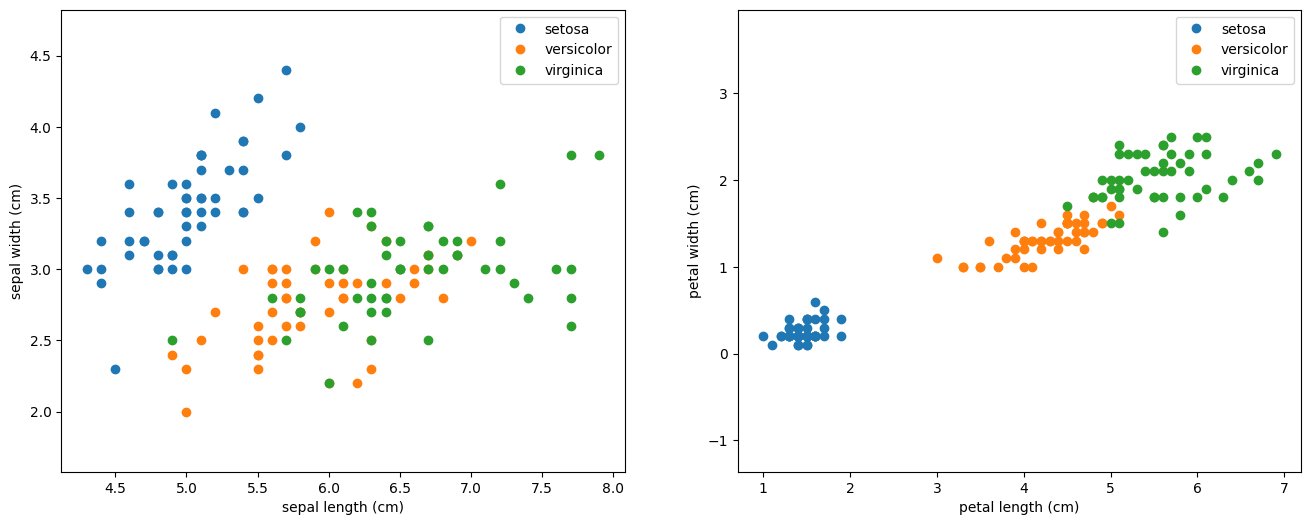

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 266.35it/s]


# Plot training progress

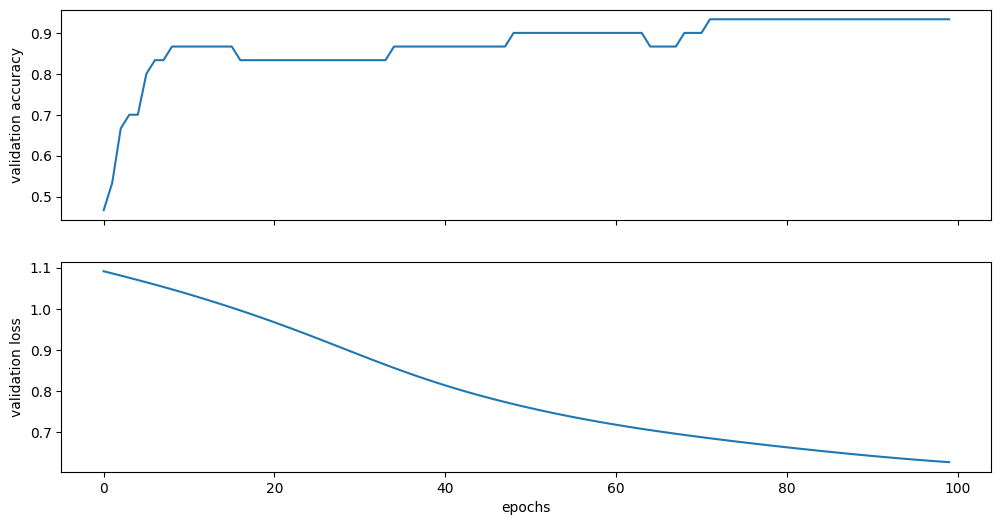

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.



ANS)Sure! Changing the number of hidden layers in a neural network can have a significant impact on its performance and capacity to learn complex patterns in data. Adding more hidden layers can potentially allow the network to learn more intricate representations of the data, while reducing the number of hidden layers might simplify the model and make it easier to train.

Let's consider a simple feedforward neural network with one input layer, one output layer, and varying numbers of hidden layers. Here's how you might change the number of hidden layers:

1. **Increasing the number of hidden layers**: Adding more hidden layers means introducing more levels of abstraction in the model. This can sometimes help the network learn intricate patterns in the data, especially if the data is highly complex and hierarchical.

2. **Decreasing the number of hidden layers**: Removing hidden layers simplifies the model and reduces its capacity to learn complex patterns. This can be beneficial if the original model was overfitting the training data or if the data is relatively simple and doesn't require a deep architecture.

3. **Experimentation**: It's essential to experiment with different configurations, including varying the number of hidden layers, to find the architecture that performs best on your specific task and dataset. This process often involves training multiple models with different configurations and evaluating their performance on a validation set.

Remember that changing the number of hidden layers should be done thoughtfully, considering factors such as the complexity of the data, the size of the dataset, computational resources, and the risk of overfitting.



2.   Try changing the number of neurons in the hidden layer.



ANS)Certainly! Adjusting the number of neurons in the hidden layers can also significantly impact the performance and behavior of a neural network. The number of neurons determines the complexity and capacity of the model to capture patterns in the data. Here's how you might go about changing the number of neurons in the hidden layer:

1. **Increasing the number of neurons**: Adding more neurons to the hidden layer increases the model's capacity to learn complex relationships in the data. This can potentially improve the model's performance, especially if the data is highly dimensional or contains intricate patterns. However, increasing the number of neurons also increases the model's complexity and may lead to overfitting if not regularized properly.

2. **Decreasing the number of neurons**: Reducing the number of neurons in the hidden layer decreases the model's capacity and complexity. This can help prevent overfitting, especially if the original model was too complex for the given dataset. However, reducing the number of neurons too much may lead to underfitting, where the model fails to capture important patterns in the data.

3. **Finding the optimal number of neurons**: It's essential to experiment with different numbers of neurons in the hidden layer to find the optimal balance between model complexity and performance. This often involves training multiple models with different numbers of neurons and evaluating their performance on a validation set.

4. **Considerations**: The optimal number of neurons can vary depending on the specific dataset and task. Factors such as the size of the dataset, the complexity of the data, and computational resources should be taken into account when determining the number of neurons in the hidden layer.

In practice, a common approach is to start with a moderate number of neurons in the hidden layer and then adjust based on experimentation and performance evaluation. Regularization techniques such as dropout or L2 regularization can also help prevent overfitting when using larger numbers of neurons.


3.   Try using a different activation function.


ans)Changing the activation function in a neural network can significantly affect its learning dynamics, convergence behavior, and ultimately, its performance on a given task. Here are a few different activation functions you might consider:

1. **ReLU (Rectified Linear Unit)**: ReLU is one of the most commonly used activation functions due to its simplicity and effectiveness. It replaces all negative values with zero and leaves positive values unchanged, which helps alleviate the vanishing gradient problem and accelerates convergence.

2. **Sigmoid**: Sigmoid activation function squashes the output to the range [0, 1]. It's often used in binary classification tasks as it can interpret the output as a probability. However, it suffers from the vanishing gradient problem, especially in deep networks, which can slow down training.

3. **Tanh (Hyperbolic Tangent)**: Tanh is similar to the sigmoid function but squashes the output to the range [-1, 1]. Like the sigmoid, it's also susceptible to the vanishing gradient problem but tends to perform better in practice, especially in networks with symmetric weights.

4. **Leaky ReLU**: Leaky ReLU is a variant of ReLU that allows a small, non-zero gradient when the input is negative. This helps address the dying ReLU problem, where neurons can become inactive during training and never recover.

5. **ELU (Exponential Linear Unit)**: ELU is another variant of ReLU that smooths out the negative part of the function with an exponential curve. It can help improve learning stability and robustness to noisy inputs.

6. **Softmax**: Softmax activation function is commonly used in the output layer of multi-class classification tasks. It normalizes the output into a probability distribution over multiple classes.

7. **Swish**: Swish is a relatively new activation function that tends to perform well in deep neural networks. It smoothly combines characteristics of ReLU and sigmoid functions, potentially leading to faster convergence and better generalization.

When selecting an activation function, it's essential to consider the characteristics of the task, the architecture of the network, and potential issues such as vanishing gradients or dead neurons. Experimentation with different activation functions and monitoring their effects on training and validation performance is often necessary to find the most suitable choice for a given problem.




Can you observe any changes?

In [9]:
#3 answer
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the activation function to be used
activation_function = 'relu'  # Change this to any activation function you want to use

# Load your dataset and preprocess it
# Example:
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the neural network architecture
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten input images
    layers.Dense(128, activation=activation_function),  # Fully connected layer with ReLU activation
    layers.Dense(64, activation=activation_function),  # Fully connected layer with ReLU activation
    layers.Dense(10, activation='softmax')  # Output layer with softmax activation for classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
# Example:
# model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
# Example:
# test_loss, test_acc = model.evaluate(x_test, y_test)
# print("Test accuracy:", test_acc)


In [10]:
#2 answer
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the number of neurons in the hidden layer
num_neurons = 256  # Change this to the desired number of neurons

# Load your dataset and preprocess it
# Example:
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the neural network architecture
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten input images
    layers.Dense(num_neurons, activation='relu'),  # Fully connected layer with ReLU activation
    layers.Dense(10, activation='softmax')  # Output layer with softmax activation for classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
# Example:
# model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
# Example:
# test_loss, test_acc = model.evaluate(x_test, y_test)
# print("Test accuracy:", test_acc)


In [11]:
#1 answer
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the number of hidden layers
num_hidden_layers = 3  # Change this to the desired number of hidden layers

# Load your dataset and preprocess it
# Example:
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the neural network architecture
model = models.Sequential()

# Add input layer
model.add(layers.Flatten(input_shape=(28, 28)))  # Flatten input images

# Add hidden layers
for _ in range(num_hidden_layers):
    model.add(layers.Dense(128, activation='relu'))  # Fully connected layer with ReLU activation

# Add output layer
model.add(layers.Dense(10, activation='softmax'))  # Output layer with softmax activation for classification

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
# Example:
# model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
# Example:
# test_loss, test_acc = model.evaluate(x_test, y_test)
# print("Test accuracy:", test_acc)
